## Initial Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools import *
from random_map_generation import *
import pandas as pd
import numpy as np
from random import randint

/home/gareth/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


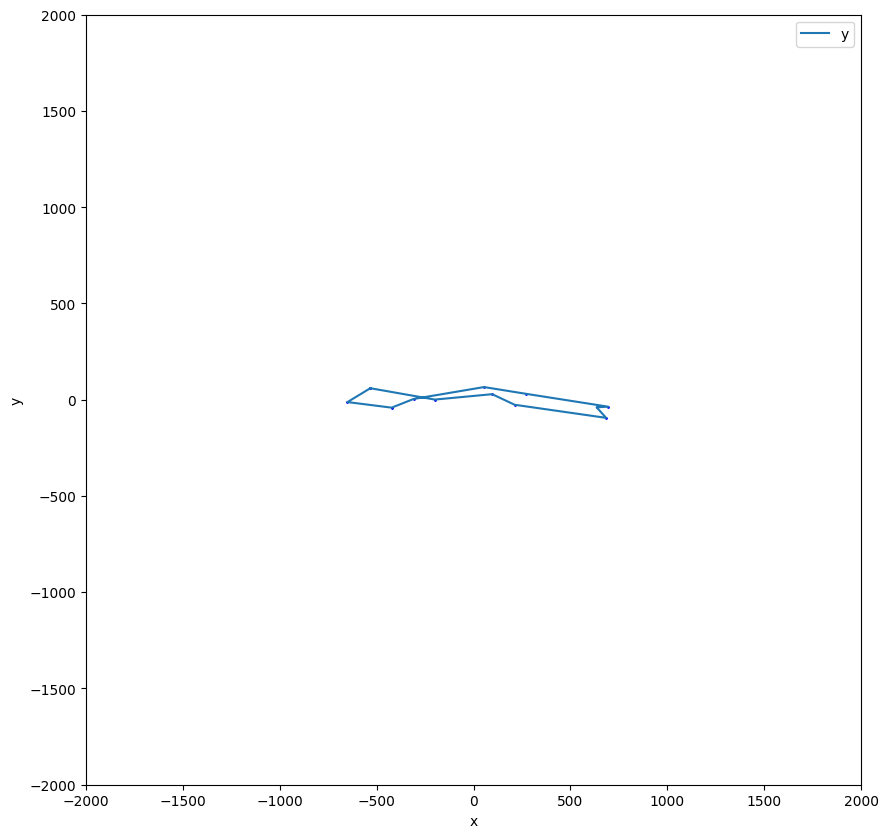

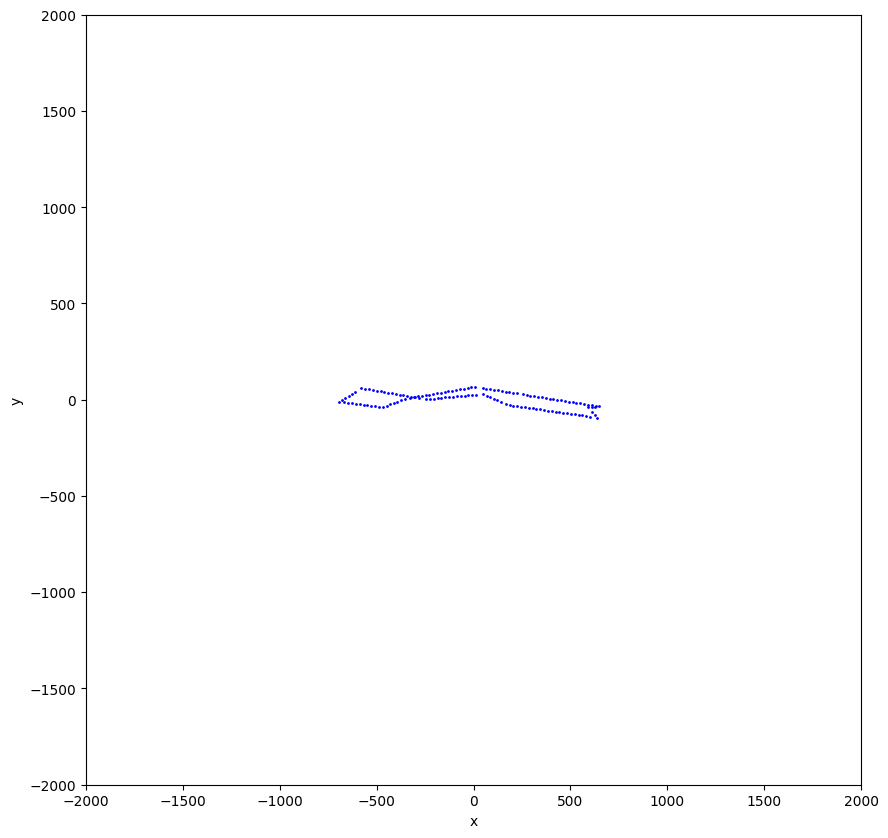

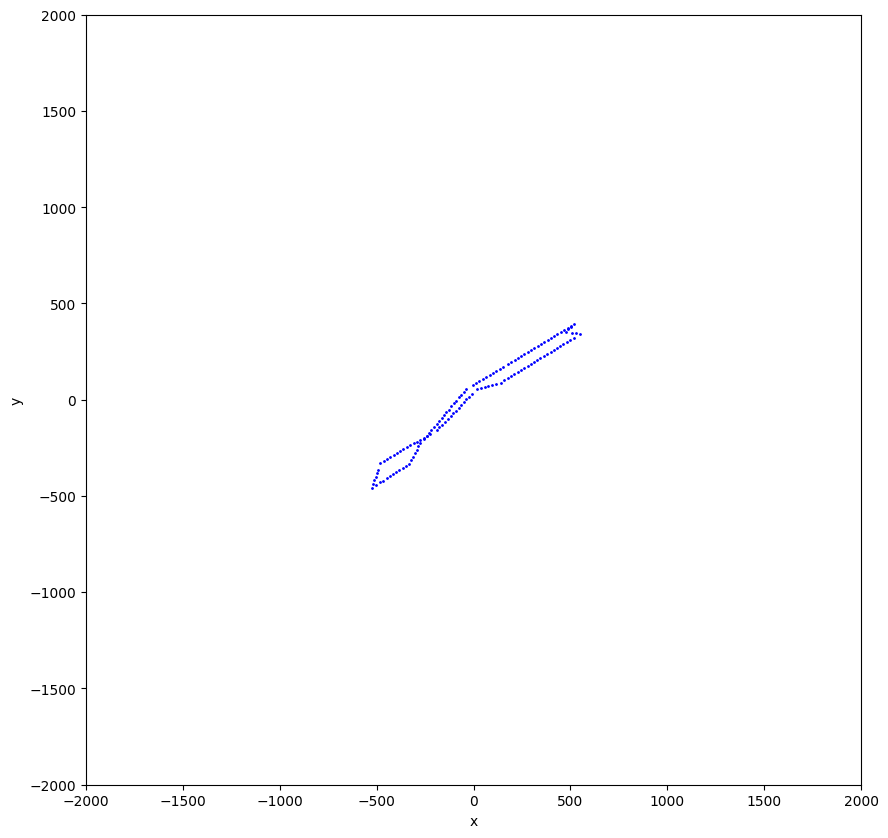

In [3]:
points = random_out_and_back()
consistent_scale_plot(points, "x", "y", connected=True)
consistent_scale_plot(sample(points), "x", "y")
consistent_scale_plot(randomise_points(sample(points)))

,x,y


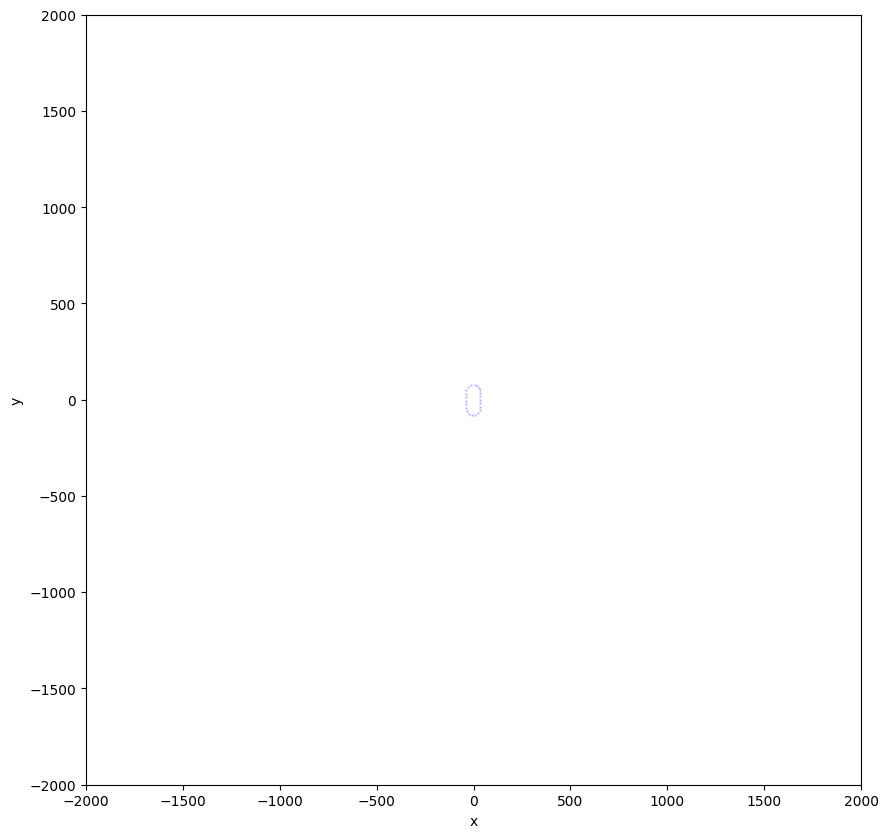

In [10]:
_400_lap = generate_400_section()
consistent_scale_plot(_400_lap)
# _400_lap

<AxesSubplot:xlabel='x', ylabel='y'>

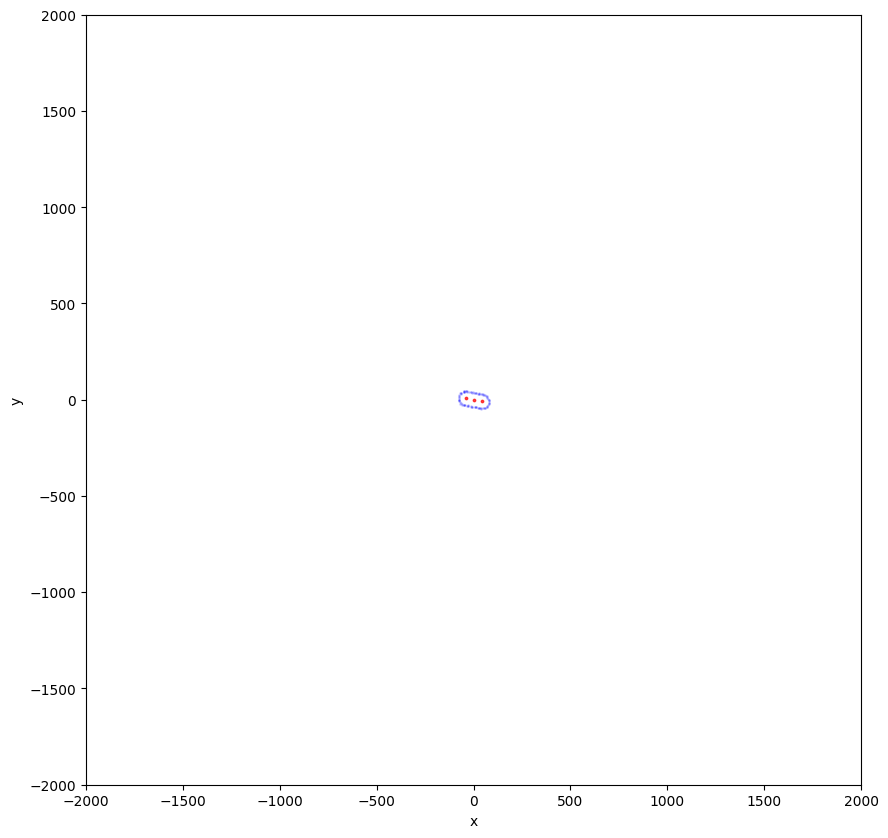

In [13]:
track, reference_points = generate_track()
consistent_scale_plot(track, reference_points=reference_points)
# track

,Timestamp,lat,long,speed,cadence,x,y
137,2021-04-05 23:37:30+00:00,-43.522626,172.57534,7.129,212.0,-11.092438,-30.505648
138,2021-04-05 23:37:34+00:00,-43.52282,172.575398,6.765,213.0,-8.382669,-42.862664
139,2021-04-05 23:37:36+00:00,-43.522834,172.575429,4.301,213.0,-6.946492,-43.749122
140,2021-04-05 23:37:50+00:00,-43.522661,172.575517,1.241,109.0,-2.897323,-32.732474
141,2021-04-05 23:38:03+00:00,-43.522507,172.575581,1.334,108.0,0.044711,-22.86929
142,2021-04-05 23:38:19+00:00,-43.52235,172.575725,1.334,109.0,6.718484,-12.926004
143,2021-04-05 23:38:34+00:00,-43.522187,172.575828,1.372,110.0,11.479935,-2.486088
144,2021-04-05 23:38:49+00:00,-43.522043,172.575989,1.381,109.0,18.881474,6.672201
145,2021-04-05 23:39:03+00:00,-43.521885,172.576115,1.446,110.0,24.734574,16.722289
146,2021-04-05 23:39:09+00:00,-43.521811,172.576163,1.446,114.0,26.929487,21.421586


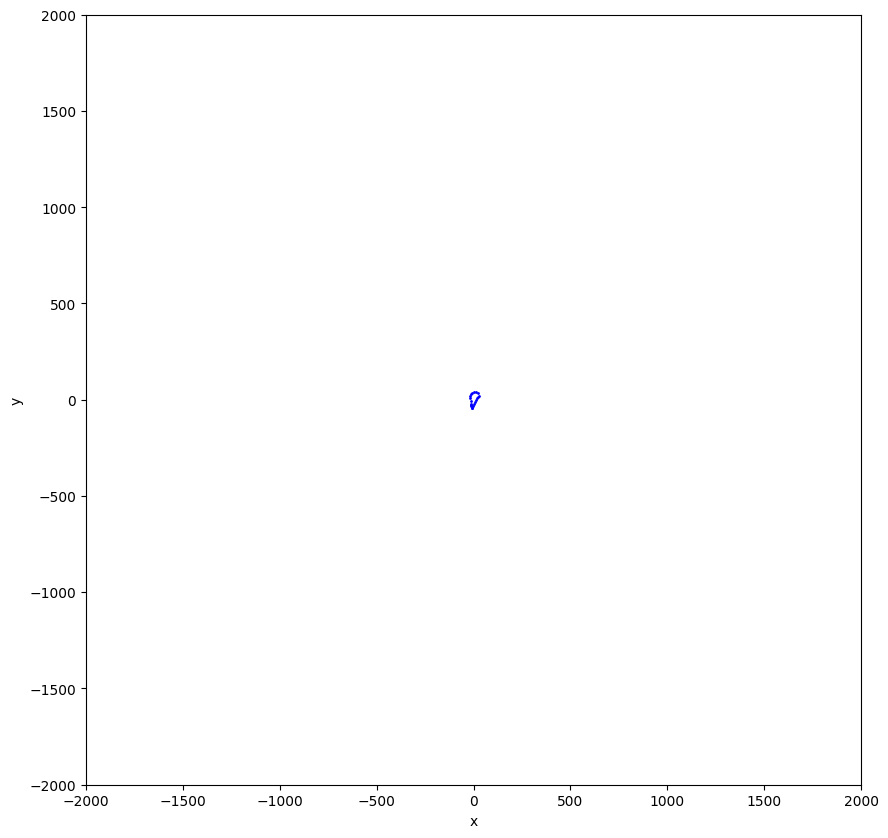

In [8]:
_200_lap = generate_200_section()
consistent_scale_plot(_200_lap)
_200_lap

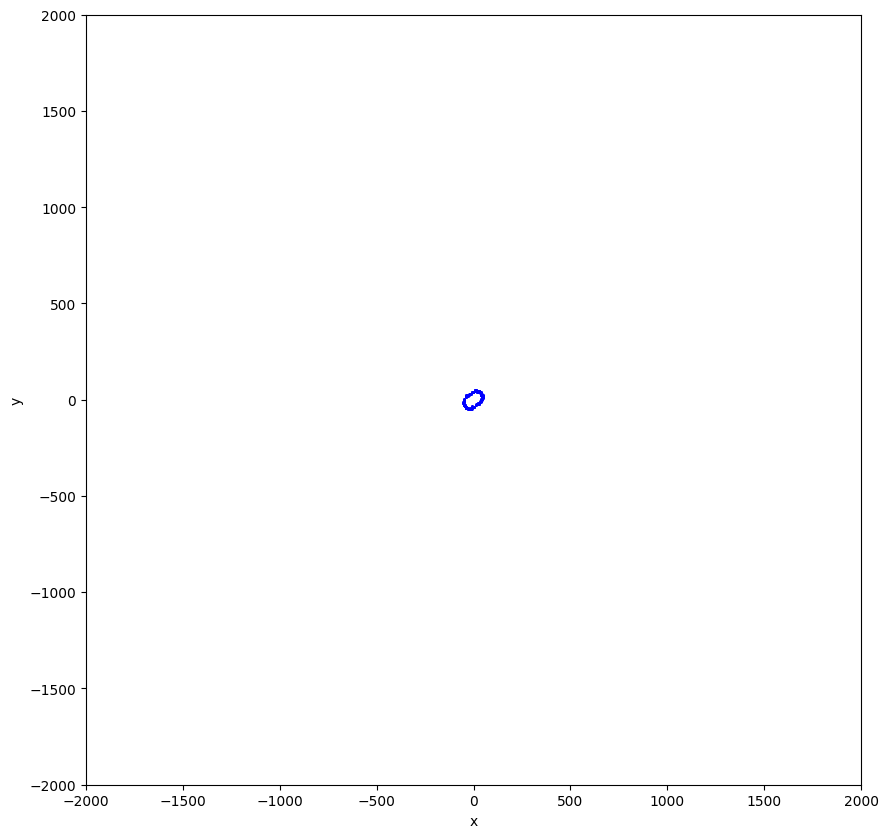

In [14]:
consistent_scale_plot(generate_track())


array([[<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>],
       [<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>],
       [<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>]], dtype=object)

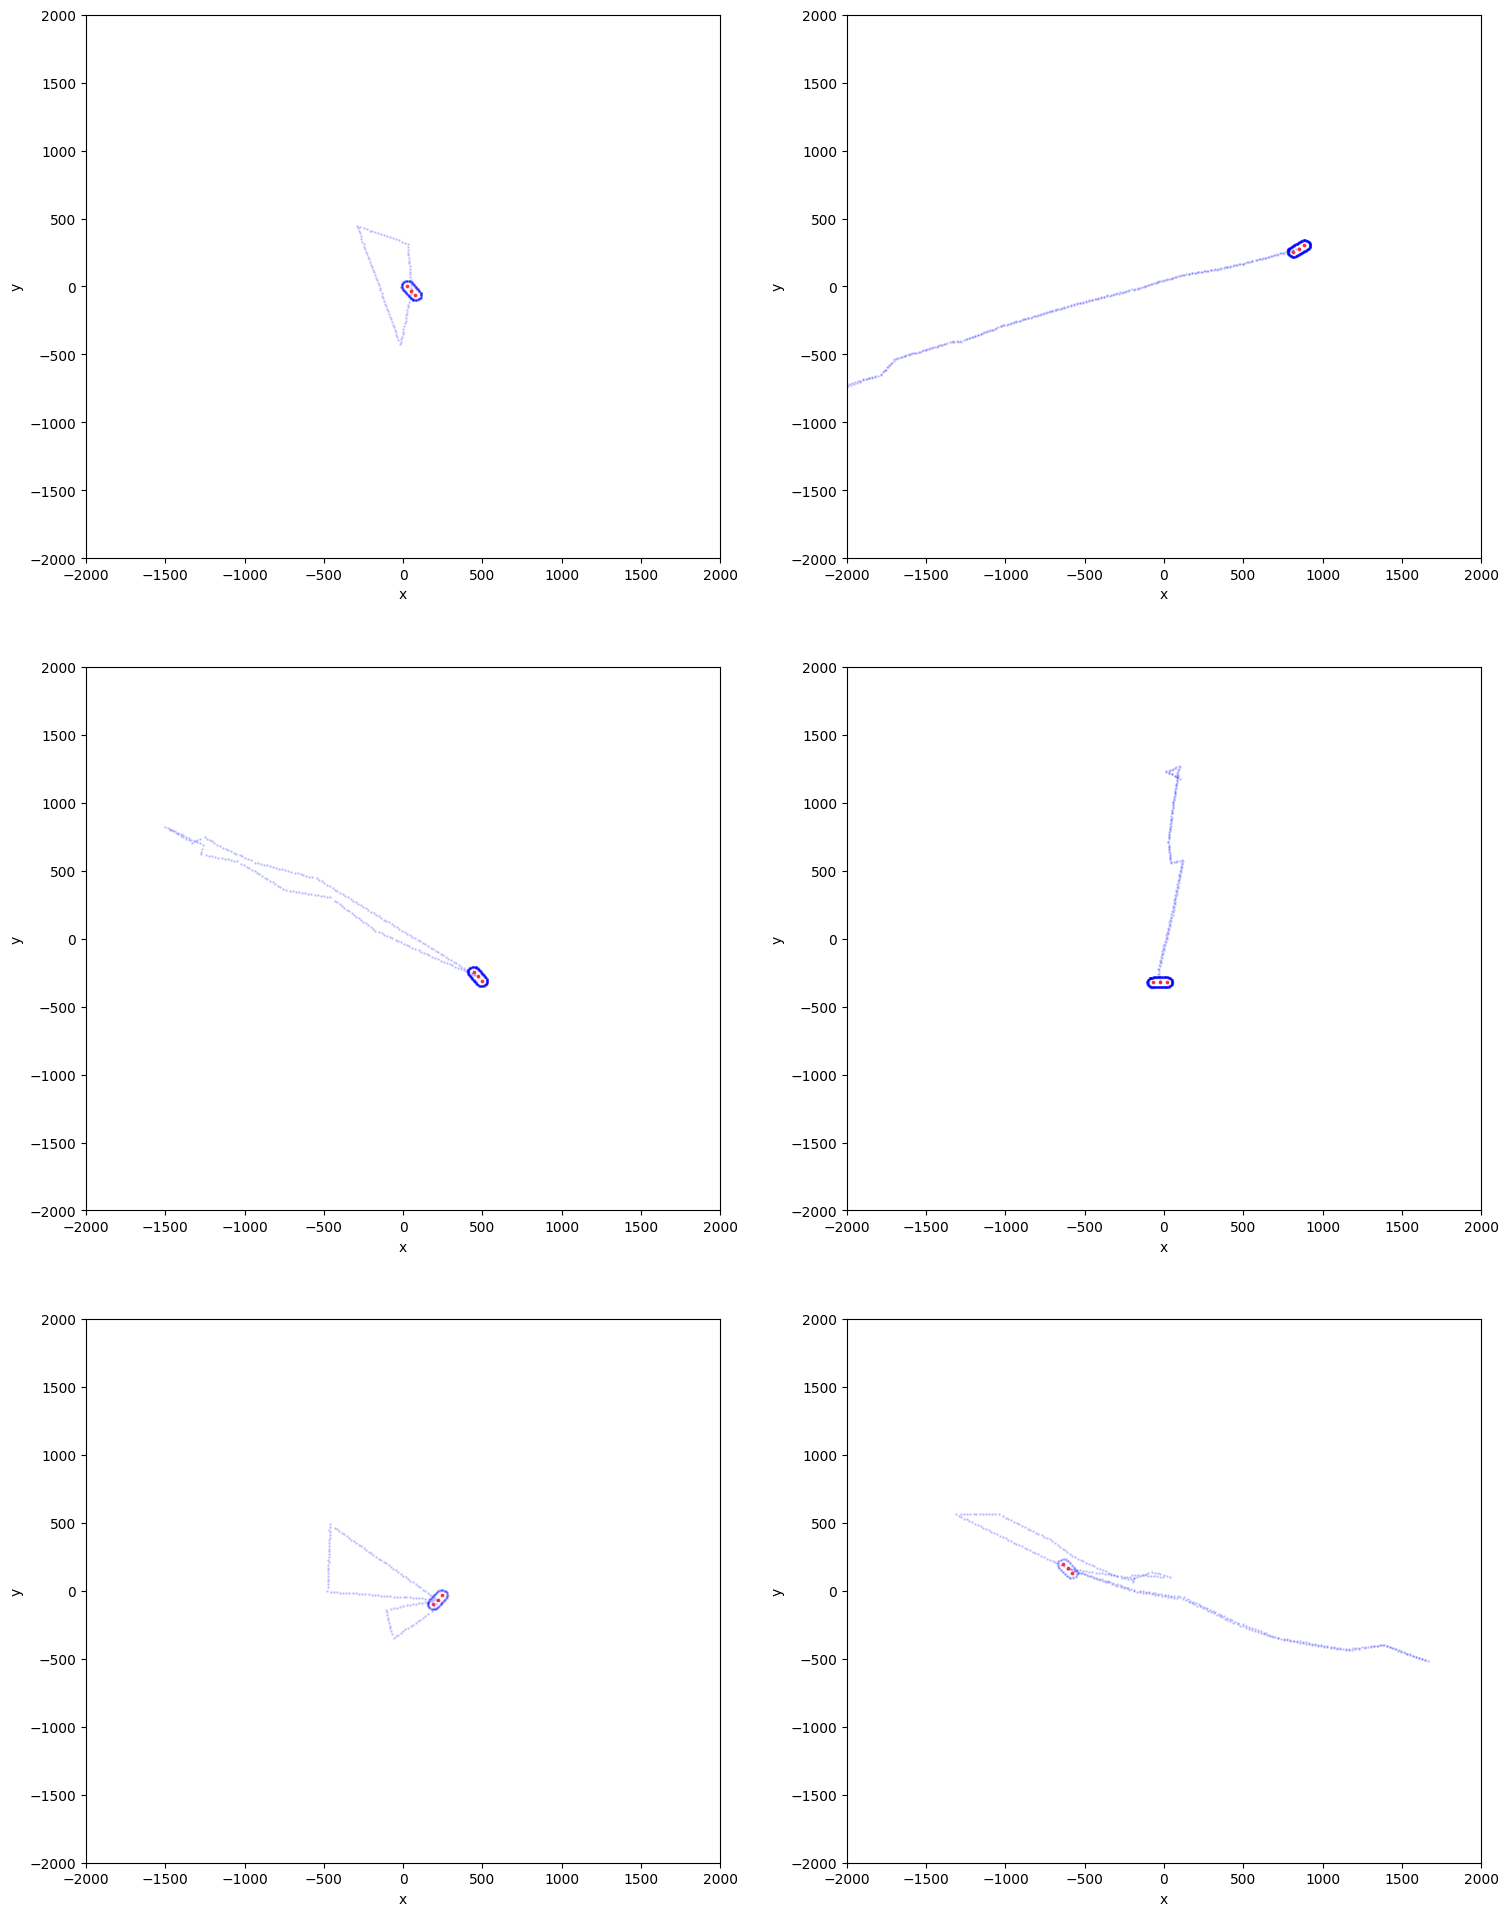

In [23]:
maps = [random_map() for _ in range(6)]
consistent_scale_plot([map[0] for map in maps], reference_points=[map[1] for map in maps])

In [31]:
activities = pd.read_csv("data/activities.csv")
workouts = activities[(activities.HAS_ACCURATE_LAPS == 0.5) | (activities.HAS_ACCURATE_LAPS == 1.0)].reset_index(drop=True)
workouts.Filename

0      activities/2221839222.tcx.gz
1      activities/2289237041.fit.gz
2      activities/2289237057.fit.gz
3      activities/2302289075.fit.gz
4      activities/2307063824.fit.gz
                   ...             
139    activities/9020005768.fit.gz
140    activities/9028217372.fit.gz
141    activities/9061708304.fit.gz
142    activities/9147956833.fit.gz
143    activities/9227237528.fit.gz
Name: Filename, Length: 144, dtype: object

array([[<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>],
       [<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>],
       [<AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>]], dtype=object)

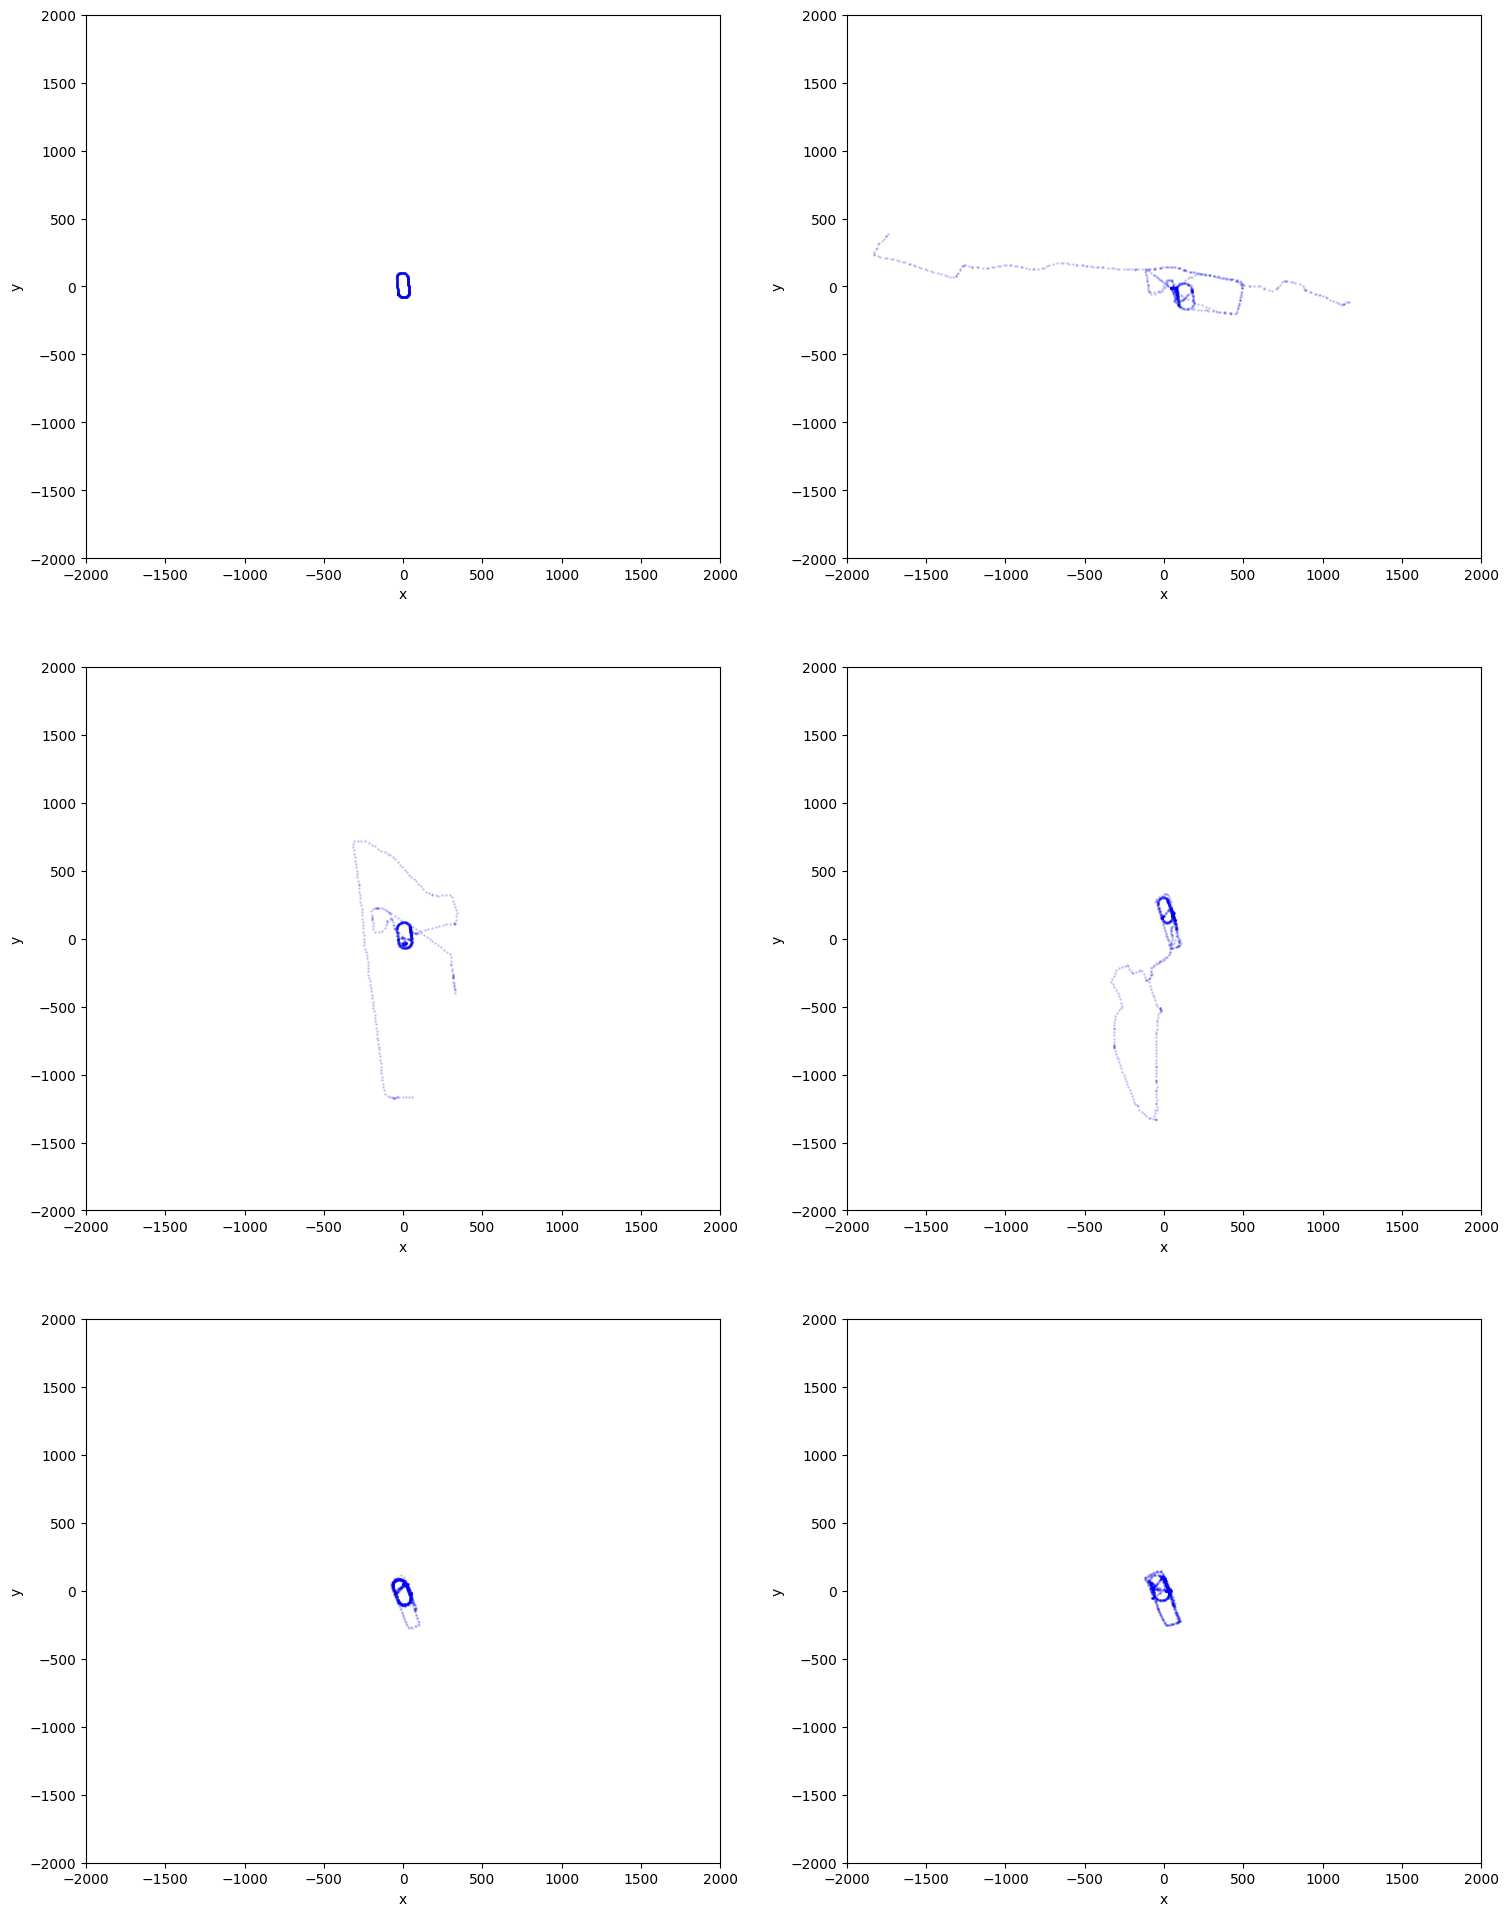

In [42]:
def random_existing_workout(workouts):
    workout = workouts.iloc[randint(0, len(workouts))].Filename
    return read_activity("data/" + workout[:-3])

random_workouts = [random_existing_workout(workouts)[0] for _ in range(6)]
consistent_scale_plot(random_workouts)

tensor([255, 255, 255,  ..., 255, 255, 255], dtype=torch.uint8)

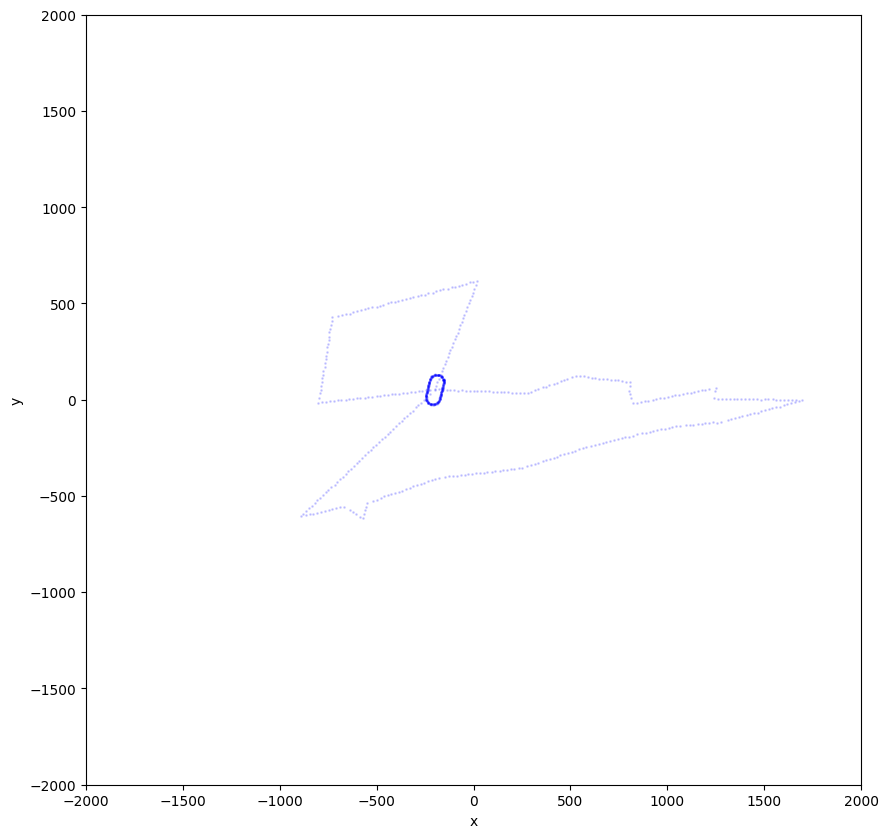

In [52]:
import torch

map = random_map()
output = map[1]
fig = consistent_scale_plot(map[0])
fig.canvas.draw()
np_fig = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
torch.from_numpy(np_fig)[2::3]   # filter for blue channel

In [54]:
track_loc = torch.cat((
    torch.tensor(output.iloc[0]),
    torch.tensor(output.iloc[1]), 
    torch.tensor(output.iloc[2])
    ))
track_loc

tensor([  0.0000,   0.0000,   9.9743,  40.9992,  -9.9743, -40.9992])